### Bibliotecas

In [2]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from statsmodels.graphics.mosaicplot import mosaic

plt.style.use("ggplot")

### Dados

In [3]:
df_masc = pd.read_csv('data/crossfit_open_masculino_2021.csv', index_col=[0])
df_fem = pd.read_csv('data/crossfit_open_feminino_2021.csv', index_col=[0])

In [4]:
df_masc['sex'] = 'male'
df_fem['sex'] = 'female'

In [5]:
df = pd.concat([df_masc, df_fem])

In [6]:
df.columns

Index(['first_name', 'lastname', 'placing', 'country', 'continent', 'age',
       'affiliate', 'points', '21.1', '21.2', '21.3', '21.4', 'weight_lifted',
       'height', 'weight', 'sex'],
      dtype='object')

In [7]:
df.head()

,first_name,lastname,placing,country,continent,age,affiliate,points,21.1,21.2,21.3,21.4,weight_lifted,height,weight,sex
index,,,,,,,,,,,,,,,,
0,JEFFRE,ADLER,1,Canada,North America,27,CrossFit Wonderland,101.0,20,8,27,46.0,143.76,175.26,89.55,male
1,SCOTT,PANCHIK,2,United States,North America,33,CrossFit Mentality,141.0,33,47,5,56.0,143.31,175.26,85.0,male
2,TRAVIS,MEAD,3,United States,North America,34,Iron Valley CrossFit,165.0,87,24,48,6.0,156.46,185.42,93.18,male
3,SAXON,PANCHIK,4,United States,North America,25,CrossFit Cliffside,217.0,5,68,87,57.0,143.31,175.26,81.82,male
4,RICHARD,FRONING JR.,5,United States,North America,33,CrossFit Mayhem,254.0,58,91,5,100.0,141.50,175.26,88.18,male


## Quais são os países com os maiores números de participantes?

### Os dez países que mais enviaram atletas por categoria (feminino x masculino)

In [8]:
male_athlete_by_country = df_masc.country.value_counts()
male_athlete_by_country.sort_values(ascending=False)
male_athlete_by_country[:10]

United States     65145
Australia          8206
United Kingdom     6080
France             6038
Canada             5321
Brazil             4994
Spain              4844
South Africa       3152
Germany            2705
Sweden             2138
Name: country, dtype: int64

In [9]:
female_athlete_by_country = df_fem.country.value_counts()
female_athlete_by_country.sort_values(ascending=False)
female_athlete_by_country[:10]

United States     58117
Australia          7452
Canada             5637
United Kingdom     4886
Brazil             3568
France             2944
South Africa       2337
Spain              2153
Germany            1829
Sweden             1802
Name: country, dtype: int64

### Os dez países que mais enviaram atletas (no total)

In [10]:
total_athlete_by_country = df.country.value_counts()
total_athlete_by_country.sort_values(ascending=False)
total_athlete_by_country[:10]

United States     123262
Australia          15658
United Kingdom     10966
Canada             10958
France              8982
Brazil              8562
Spain               6997
South Africa        5489
Germany             4534
Sweden              3940
Name: country, dtype: int64

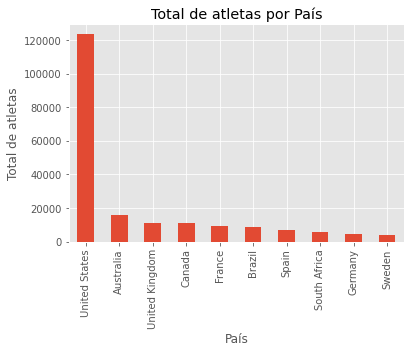

In [11]:
total_athlete_by_country[0:10].plot.bar(title="Total de atletas por País")
plt.xlabel("País")
plt.ylabel("Total de atletas");

## Qual a quantidade de participantes por continente de origem?

### Quantidade por categoria por continente


In [12]:
# masculino
df_masc['continent'].value_counts()

North America    73659
Europe           34317
Oceania           9930
Asia              8194
South America     7076
Africa            4287
Name: continent, dtype: int64

In [13]:
# feminino
df_fem['continent'].value_counts()

North America    65536
Europe           22399
Oceania           8958
South America     4570
Asia              4138
Africa            2998
Name: continent, dtype: int64

### Quantidade total de atletas por continente

In [14]:
df['continent'].value_counts()

North America    139195
Europe            56716
Oceania           18888
Asia              12332
South America     11646
Africa             7285
Name: continent, dtype: int64

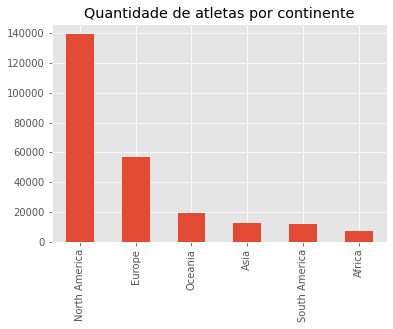

In [15]:
df['continent'].value_counts().plot.bar(title="Quantidade de atletas por continente");

## Quais são as academias com maior número de filiados que participaram do Crossfit Open 2021?
Aqui foram ignorados os participantes que declararam não estar filiados a uma academia oficila de Crossfit.

### Número de filiados por categoria

In [16]:
affiliate_gym_m = df_masc['affiliate'].value_counts()
affiliate_gym_m

not_affiliate                        24783
CrossFit Coraje                        156
CrossFit 1530                          127
P1 CrossFit                            124
CrossFit Torian                        121
                                     ...  
CrossFit First Time                      1
Muralha CrossFit                         1
Driven by CrossFit Temecula South        1
CrossFit Leopards                        1
CrossFit GEDS                            1
Name: affiliate, Length: 10004, dtype: int64

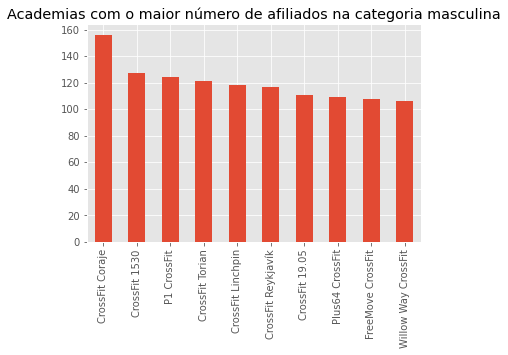

In [17]:
affiliate_gym_m[1:11].plot.bar(title="Academias com o maior número de afiliados na categoria masculina");

In [18]:
affiliate_gym_f = df_fem['affiliate'].value_counts()
affiliate_gym_f

not_affiliate             15062
Plus64 CrossFit             103
CrossFit Boynton Beach      102
CrossFit Reykjavík           97
CrossFit Blade               93
                          ...  
CrossFit Blue Fenix           1
CrossFit Hanover              1
CrossFit Harpia               1
WSMR CrossFit                 1
CrossFit Sunbury              1
Name: affiliate, Length: 9196, dtype: int64

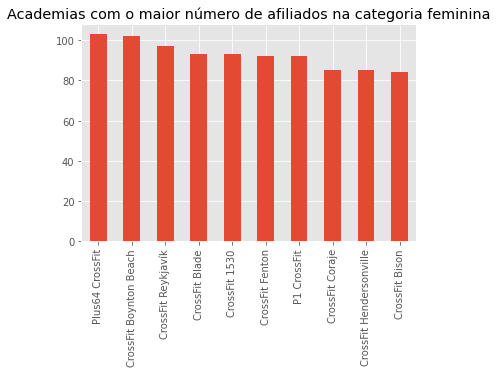

In [19]:
affiliate_gym_f[1:11].plot.bar(title="Academias com o maior número de afiliados na categoria feminina");

### Número de filiados total

In [20]:
affiliate_gym = df['affiliate'].value_counts()
affiliate_gym

not_affiliate           39845
CrossFit Coraje           241
CrossFit 1530             220
P1 CrossFit               216
CrossFit Reykjavík        214
                        ...  
ETSMTL CrossFit             1
CrossFit Kama               1
CrossFit Portus 1992        1
CrossFit 1995               1
Rim Country CrossFit        1
Name: affiliate, Length: 10329, dtype: int64

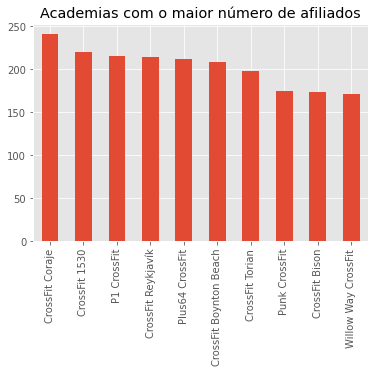

In [21]:
affiliate_gym[1:11].plot.bar(title="Academias com o maior número de afiliados");

## Procurando correlação

In [22]:
import seaborn as sns

# x = df[['placing', 'country', 'age', 'height', 'weight', 'affiliate']]
# sns.pairplot(x)